In [34]:
from utils.error.uncertainty import Uncertainty

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data.raw import raw_data

In [35]:
col_names = ["Concentration (Mol NaCl)",
             "Average root count",
             "Average root count uncertainty",
             "Average root length (mm)",
             "Average root length uncertainty"]
processed = {}

for k in raw_data:
    avg_root_count = Uncertainty.from_average(raw_data[k].count())
    avg_root_length = Uncertainty.from_average(np.mean(raw_data[k]))
    processed[k] = [k, avg_root_count.num, avg_root_count.absolute, avg_root_length.num, avg_root_length.absolute]
df = pd.DataFrame.from_dict(processed, columns=col_names, orient='index').fillna(0)

array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

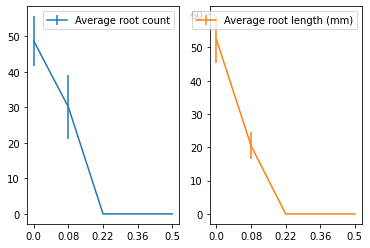

In [36]:
df[["Average root count", "Average root length (mm)"]].plot(subplots=True, layout=(1,2), yerr=df[["Average root count uncertainty", "Average root length uncertainty"]].values.T)

In [37]:
plt.show()